In [22]:
import pandas as pd
import numpy as np

# import nltk
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

%matplotlib inline

In [37]:
DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
data = pd.read_json(DATA_JSON_FILE)
data.MESSAGE[1]

'ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC\'s performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99!  <Includes FREE Shipping!>\n\n\n\nDon\'t fall prey to destructive viruses or hackers!\n\nProtect  your computer and your valuable information!\n\n\n\n\n\nSo don\'t delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n

## Natural Language Processing

### Download the NLTK Resources

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/basti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/basti/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
msg = 'All work and no play makes Jack a dull boy.'
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']

In [17]:
stop_words = set(stopwords.words('english'))
words = word_tokenize(msg.lower())
filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


In [21]:
msg = 'All work and no play makes Jack a dull boy. Nobody expects the Spanish Inquisition!'

stop_words = set(stopwords.words('english'))
words = word_tokenize(msg.lower())
stemmer = SnowballStemmer('english')

filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


### Removing HTML from emails

In [28]:
# soup = BeautifulSoup(data.at[0, 'MESSAGE'], 'html.parser')

### Functions for email Processing

In [40]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to lower case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [41]:
clean_message(data.MESSAGE[1])

['attent',
 'must',
 'comput',
 'user',
 'packag',
 'deal',
 'norton',
 'systemwork',
 'softwar',
 'suit',
 'includ',
 'six',
 'ye',
 'util',
 'special',
 'low',
 'price',
 'softwar',
 'protect',
 'comput',
 'unwant',
 'hazard',
 'virus',
 'help',
 'secur',
 'privat',
 'valuabl',
 'inform',
 'allow',
 'transfer',
 'file',
 'send',
 'safe',
 'backup',
 'data',
 'quick',
 'easili',
 'improv',
 'pc',
 'perform',
 'integr',
 'diagnost',
 'util',
 'great',
 'price',
 'combin',
 'retail',
 'valu',
 'fall',
 'prey',
 'destruct',
 'virus',
 'hacker',
 'protect',
 'comput',
 'valuabl',
 'inform',
 'delay',
 'get',
 'copi',
 'today',
 'http',
 'email',
 'screen',
 'filter',
 'hous',
 'system',
 'complianc',
 'state',
 'law',
 'wish',
 'mail',
 'well',
 'list',
 'thousand',
 'email',
 'provid',
 'pleas',
 'visit',
 'http']

In [48]:
data.iat[2, 2]

2

In [49]:
data.iloc[0:5]

,MESSAGE,CATEGORY,DOC_ID
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",1,0
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,1,1
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,1,2
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1,3
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,1,4


In [50]:
data.MESSAGE.iloc[0:3]

00249.5f45607c1bffe89f60ba1ec9f878039a    Dear Homeowner,\n\n \n\nInterest Rates are at ...
00373.ebe8670ac56b04125c25100a36ab0510    ATTENTION: This is a MUST for ALL Computer Use...
00214.1367039e50dc6b7adb0f2aa8aba83216    This is a multi-part message in MIME format.\n...
Name: MESSAGE, dtype: object

In [51]:
first_emails = data.MESSAGE.iloc[0:3]

first_emails.apply(clean_message)

00249.5f45607c1bffe89f60ba1ec9f878039a    [dear, homeown, interest, rate, lowest, point,...
00373.ebe8670ac56b04125c25100a36ab0510    [attent, must, comput, user, packag, deal, nor...
00214.1367039e50dc6b7adb0f2aa8aba83216    [messag, mime, format, dare, tri, find, better...
Name: MESSAGE, dtype: object

In [52]:
nested_list = first_emails.apply(clean_message)

In [53]:
flat_list = [item for sublist in nested_list for item in sublist]

len(flat_list)

222

In [56]:
%%time

# Use apply() on all the messages in the dataframe
nested_list = data.MESSAGE.apply(clean_message)

/Users/basti/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


CPU times: user 40.8 s, sys: 538 ms, total: 41.4 s
Wall time: 41.9 s


In [58]:
len(nested_list)

5796

## Slicing Dataframes

In [59]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [60]:
data[data.CATEGORY == 1].tail()

,MESSAGE,CATEGORY,DOC_ID
01311.43bfe86df65d53c5f7ca2365dc12582b,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,1893
00851.dc5452f80ba0bb8481dfc48f70380c4d,<html>\n\n<HEAD> \n\n<TITLE>creditfix</TITLE> ...,1,1894
01328.b23902de23cb3ca1f3334517282372b2,Hello:\n\n\n\nAre you satisfied with your ISP?...,1,1895
01244.9ef966101737a6fc27d8965def288d70,<html><HEAD><TITLE>creditfix</TITLE> \n\n</HEA...,1,1896
00788.b98a23c07d59156d172683fc29b80661,<HTML><HEAD></HEAD><BODY><b><FONT SIZE=3D4>In ...,1,1897


In [67]:
doc_ids_spam = data[data.CATEGORY == 1].DOC_ID
doc_ids_ham = data[data.CATEGORY == 0].DOC_ID

In [69]:
type(doc_ids_ham)

pandas.core.series.Series

## Wordcloud

In [75]:
from wordcloud import WordCloud

In [71]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to /Users/basti/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package shakespeare to
[nltk_data]     /Users/basti/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.


True

In [72]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [73]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ' '.join(word_list)

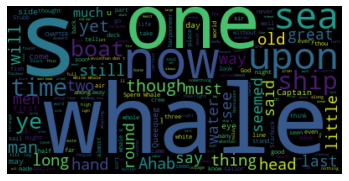

In [78]:
word_cloud = WordCloud().generate(novel_as_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()